# FastAI Age Classifier

Using FastAI's framework it is pretty easy to create our classifier with just a few lines of code.

In [1]:
from __future__ import print_function, division
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
from fastai.vision import *
from fastai.basics import *
from fastai.callbacks import *
from fastai.widgets import ClassConfusion
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/My Drive/Face_Age_Train_Val.zip'

In [4]:
tfms = get_transforms(max_rotate=15, flip_vert=False) # add transforms for data augmentation

In [ ]:
data = ImageDataBunch.from_folder('/content/Face_Age_Train_Val', ds_tfms=tfms) # get the data from the path

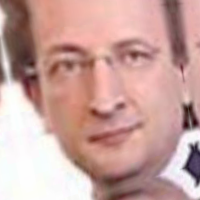

In [ ]:
img,label = data.train_ds[0] #example of one of the images
img

In [ ]:
data.valid_ds

LabelList (2898 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
40-44,40-44,40-44,40-44,40-44
Path: /content/Face_Age_Train_Val

In [ ]:
data.train_ds

LabelList (16372 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
40-44,40-44,40-44,40-44,40-44
Path: /content/Face_Age_Train_Val

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy) # try different model architectures
learn.fit(20)

In [ ]:
learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy)
learn.fit(20)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.729366,1.500064,0.473775,0.526225,02:14
1,1.517168,1.385024,0.495859,0.504141,02:14
2,1.381477,1.263643,0.524500,0.475500,02:14
3,1.339095,1.315368,0.514148,0.485852,02:15
4,1.241912,1.173910,0.548654,0.451346,02:16
5,1.184719,1.113578,0.574534,0.425466,02:16
6,1.155466,1.087951,0.593858,0.406142,02:16
7,1.095369,1.035080,0.611801,0.388199,02:17
8,1.068955,0.988363,0.640097,0.359903,02:18
9,0.981524,0.958212,0.638026,0.361974,02:18


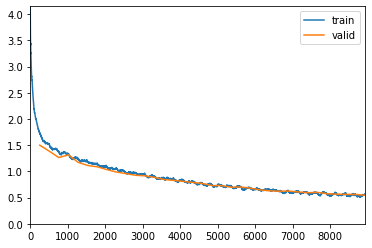

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate])
learn.fit(35,callbacks=[ShowGraph(learn),SaveModelCallback(learn, every='epoch', monitor='accuracy')])

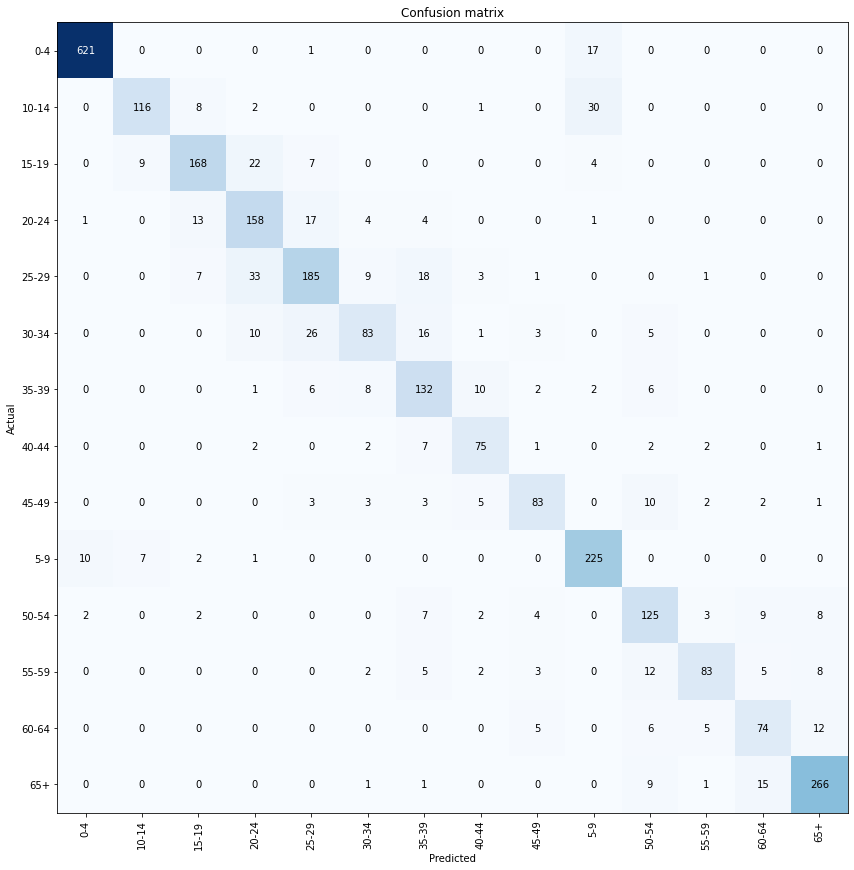

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

We can see that our model does pretty well. If the image isn't correctly classified then it's most likely predicted to be a close age group to the actual class. Note that the 5-9 group is not in correct order.

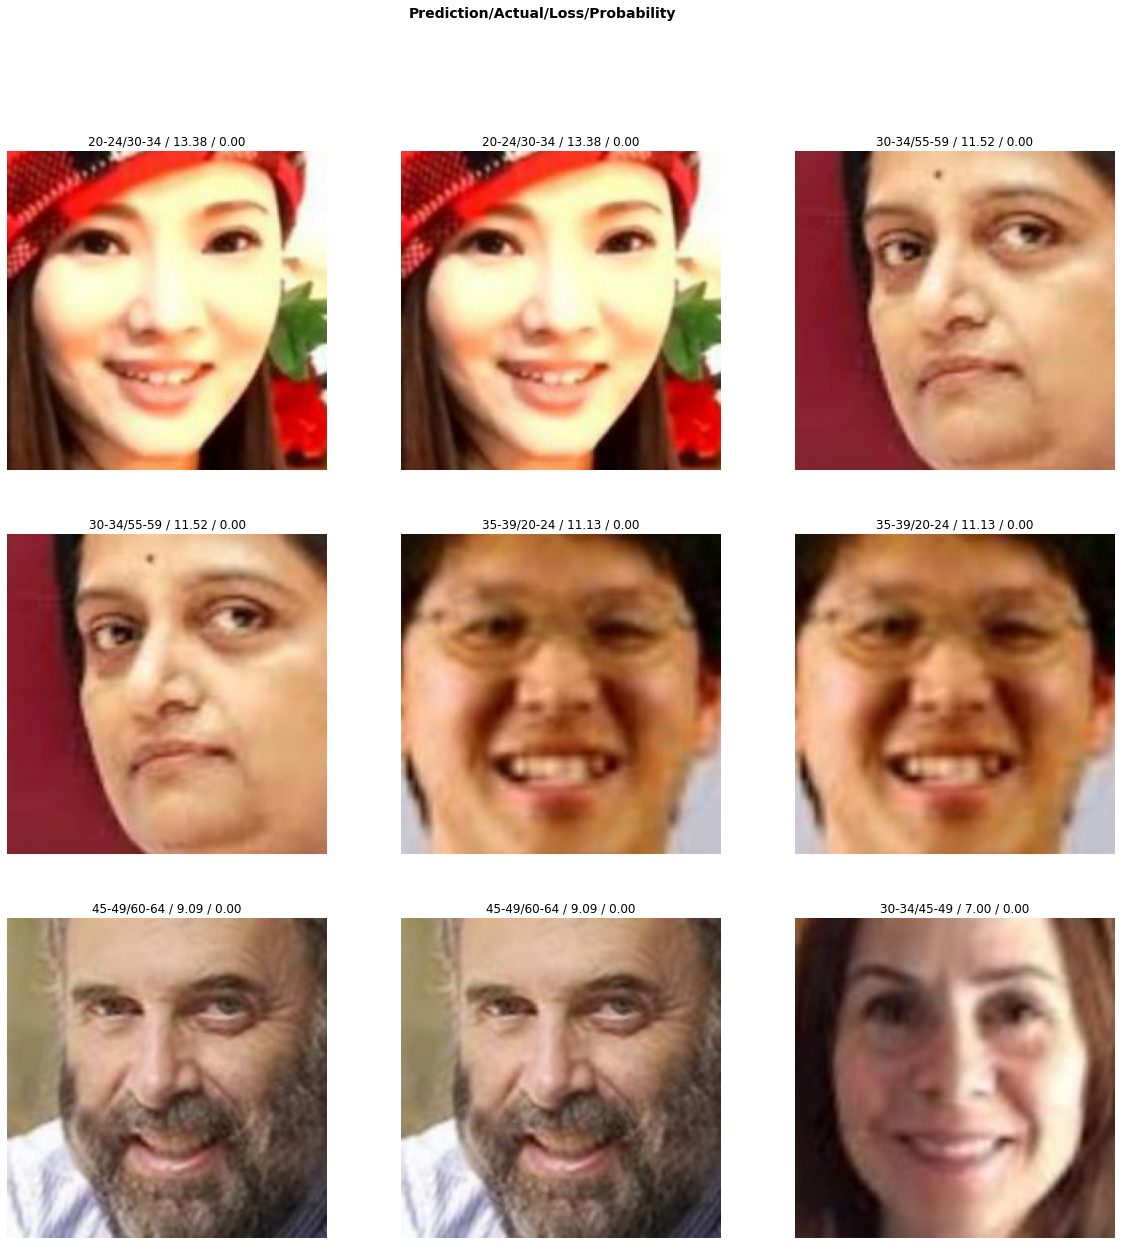

In [ ]:
interp.plot_top_losses(9, figsize=(20,20))

These are the images that had the least probability for the actual class. You can see that the predicted class does look poassible for some. People can look younger and older than they actually are.

In [1]:
# classlist = ['0-4', '5-9', '10-14', '15-19']
# ClassConfusion(interp, classlist, is_ordered=False, figsize=(8,8));

In [ ]:
learn.export()

In [15]:
model = load_learner('/content/drive/My Drive/model/')